# Setup

### Activate inline plotting

In [1]:
%pylab inline
import sys
sys.path.insert(0, '..')

Populating the interactive namespace from numpy and matplotlib


### Import Dataset(s)

In [2]:
from data import Dataset, Dataset_SimChen

In [3]:
signal = Dataset('../data/signal_TDR.root')

In [4]:
mu_neutron_bg = Dataset_SimChen('../data/muon_neutron_beam_bg.root')

In [5]:
other_bg = Dataset_SimChen('../data/other_beam_bg.root')

### Drawing Function(s)

In [6]:
def setup_plot_for_detector(size=(15, 15)):
    figsize(*size)
    axes(polar=True)
    # set appropriate
    ylim(0, 85)   

### Sandbox

In [26]:
print sorted(set(signal.track_rhos))
print len(set(signal.track_phis))

[18.0, 18.657142857142858, 19.314285714285713, 19.971428571428572, 20.62857142857143, 21.285714285714285, 21.942857142857143, 22.600000000000001, 23.25714285714286, 23.914285714285715, 24.571428571428573, 25.228571428571428, 25.885714285714286, 26.542857142857144, 27.200000000000003, 27.857142857142861, 28.514285714285716, 29.171428571428571, 29.828571428571429, 30.485714285714288, 31.142857142857146, 31.800000000000004, 32.457142857142856, 33.114285714285714, 33.771428571428572, 34.428571428571431, 35.085714285714289, 35.742857142857147, 36.400000000000006, 37.057142857142864, 37.714285714285722, 38.371428571428574, 39.028571428571432, 39.68571428571429, 40.342857142857142, 41.0, 41.657142857142858, 42.314285714285717, 42.971428571428575, 43.628571428571433, 44.285714285714292, 44.94285714285715, 45.600000000000009, 46.257142857142867, 46.914285714285718, 47.571428571428577, 48.228571428571435, 48.885714285714286, 49.542857142857144, 50.200000000000003]
200


In [13]:
from scipy.sparse import *
from scipy.stats import norm
#setup_plot_for_detector()
rhos, phis = signal.get_wires_rhos_and_phis()
t_rhos, t_phis = signal.get_tracks_rhos_and_phis()
#scatter(phis, rhos, marker='.', s=5)

corresp = lil_matrix((signal.total_wires,signal.n_track_bins))
for trk_bin in range(5000,5100):
    for wire_id in range(signal.total_wires):
        this_dist = signal.trk_wire_dist(wire_id,trk_bin) - signal.signal_r
        if abs(this_dist) < signal.track_smear:
            corresp[wire_id,trk_bin] = signal.dist_prob(this_dist)

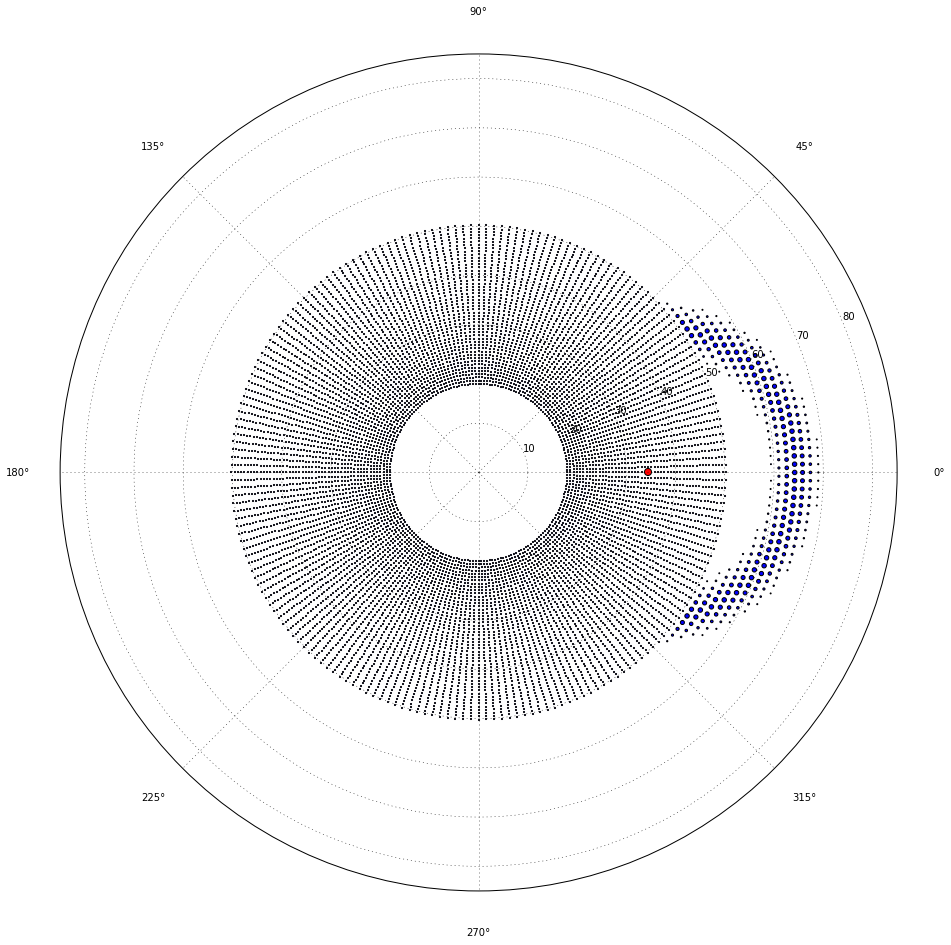

In [24]:
trk_0 = 5000
corr_track = find(signal.correspondence[:,trk_0])[0]
signal_size = find(signal.correspondence[:,trk_0])[2]
setup_plot_for_detector()
rhos, phis = signal.get_wires_rhos_and_phis()
t_rhos, t_phis = signal.get_tracks_rhos_and_phis()
#scatter(phis, rhos, marker='.', s=5)
scatter(t_phis, t_rhos, marker='.', s=5)

scatter(phis[corr_track],rhos[corr_track], signal_size*100, marker='o', c='b')
scatter(t_phis[trk_0],t_rhos[trk_0], marker='o', s=50, c='r')